<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/main/SAS_on_Colab_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This is an example notebook to show how to run SAS on GoogleColab using SASonDemand Academics account**

You will need to install SASPy only once and all you need to run SAS on GoogleColab Jupyter notebook is a SASonDemand Academics account and a GoogleColab account.

1) Install SASPy

In [1]:
!pip install saspy
# You need to do this only once
# Once saspy is installed you can always connect a SAS session using you SAS OnDemandAcademics user id and password.


     |████████████████████████████████| 6.4MB 3.6MB/s 
  Created wheel for saspy: filename=saspy-3.6.5-cp37-none-any.whl size=6413234 sha256=8bc21546ff8dbf3c14be9012ff0c5f4f2a79f66db4ff1bf28b76a8ee5f0b4973
  Stored in directory: /root/.cache/pip/wheels/da/21/c1/2a0ac17851486a17435a2590e9b05f11359183359863d314b6
Successfully built saspy


2) Import SASPy 

In [2]:
import saspy
saspy

<module 'saspy' from '/usr/local/lib/python3.7/dist-packages/saspy/__init__.py'>

There is a configuration file created automatically which can be viewed using the following command

In [3]:
saspy.list_configs()

['/usr/local/lib/python3.7/dist-packages/saspy/sascfg.py']

3) *This is the most important step where we initiate a SAS session using the iomhost for United states.*

The rest of the settings remain the same. When running this in a different location. The IOM host will need to be changed as follows:

####**US Home Region**
iomhost = ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com']

####**European Home Region**
iomhost = ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com']

####**Asia Pacific Home Region**
iomhost = ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com']


Once you run the line below, you will be prompted for you SAS OnDemandAcademics username and password. This will connect you to a SAS session and you should be able to use SAS further


In [5]:
sas = saspy.SASsession(java='/usr/bin/java', iomhost=['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')

Using SAS Config named: default
Please enter the IOM user id: kerulsuthar@gmail.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 138

No encoding value provided. Will try to determine the correct encoding.
Setting encoding to utf_8 based upon the SAS session encoding value of utf-8.



The only difference when running SAS statements on GoogleColab is that you need to submit you SAS statements in a wrapper as shown below.


sas.submitLST("""
YOUR CODE
""") 


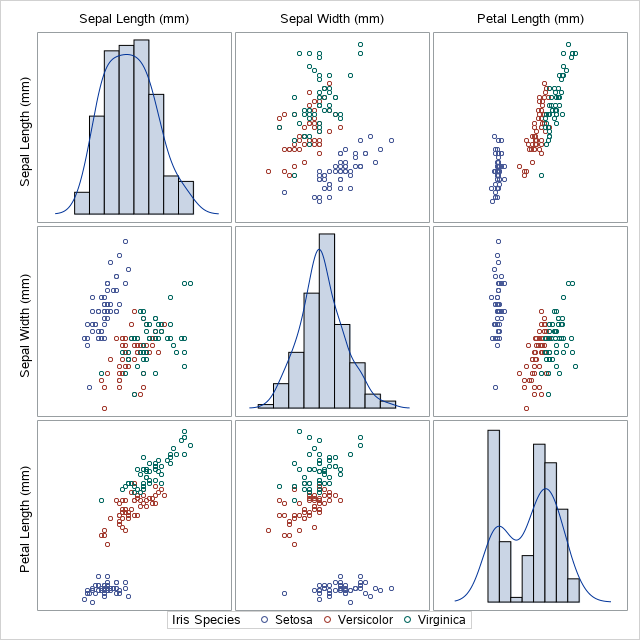

In [38]:
sas.submitLST("""
proc sgscatter data=sashelp.iris; 
matrix SepalLength--PetalLength /group=Species diagonal=(histogram kernel);
run;
""")

In [35]:

sas.submitLST("""
proc candisc data=sashelp.iris out=outcan distance anova;
class Species; 
var SepalLength SepalWidth PetalLength PetalWidth;
run;
""")